In [57]:
# https://www.kaggle.com/competitions/melting-point/overview
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [58]:
train = pd.read_csv(r'C:\Users\Emre\Desktop\Datasets\MeltingPoint\train.csv')
test = pd.read_csv(r'C:\Users\Emre\Desktop\Datasets\MeltingPoint\test.csv')

In [66]:
train.head()

,id,SMILES,Tm,Group 1,Group 2,Group 3,Group 4,Group 5,Group 6,Group 7,...,Group 415,Group 416,Group 417,Group 418,Group 419,Group 420,Group 421,Group 422,Group 423,Group 424
0,2175,FC1=C(F)C(F)(F)C1(F)F,213.15,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1222,c1ccc2c(c1)ccc3Nc4ccccc4c23,407.15,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2994,CCN1C(C)=Nc2ccccc12,324.15,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1704,CC#CC(=O)O,351.15,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2526,CCCCC(S)C,126.15,2,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
test.head()

,id,SMILES,Group 1,Group 2,Group 3,Group 4,Group 5,Group 6,Group 7,Group 8,...,Group 415,Group 416,Group 417,Group 418,Group 419,Group 420,Group 421,Group 422,Group 423,Group 424
0,1022,CCOC(=O)c1ccc(O)cc1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1146,CCCCCCc1ccc(O)cc1O,1,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,79,ClCBr,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2279,C=CCCCCCCCC,1,7,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1342,Fc1ccc(cc1)C(F)(F)F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
train.isna().sum()

id           0
SMILES       0
Tm           0
Group 1      0
Group 2      0
            ..
Group 420    0
Group 421    0
Group 422    0
Group 423    0
Group 424    0
Length: 427, dtype: int64

In [60]:
train.duplicated().sum()

np.int64(0)

In [61]:
train.describe()

,id,Tm,Group 1,Group 2,Group 3,Group 4,Group 5,Group 6,Group 7,Group 8,...,Group 415,Group 416,Group 417,Group 418,Group 419,Group 420,Group 421,Group 422,Group 423,Group 424
count,2662.000000,2662.000000,2662.000000,2662.000000,2662.000000,2662.000000,2662.000000,2662.000000,2662.000000,2662.000000,...,2662.000000,2662.000000,2662.0,2662.000000,2662.0,2662.0,2662.0,2662.0,2662.0,2662.0
mean,1652.887303,278.263452,1.020661,1.582269,0.114951,0.036439,0.036814,0.022915,0.013524,0.010143,...,0.001127,0.000751,0.0,0.001878,0.0,0.0,0.0,0.0,0.0,0.0
std,955.005512,85.117914,1.353640,3.738416,0.425964,0.208307,0.205516,0.164037,0.118732,0.117480,...,0.033558,0.027405,0.0,0.058126,0.0,0.0,0.0,0.0,0.0,0.0
min,1.000000,53.540000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
25%,830.250000,217.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
50%,1642.500000,277.300000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
75%,2469.750000,325.150000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
max,3328.000000,897.150000,16.000000,42.000000,6.000000,3.000000,2.000000,2.000000,2.000000,2.000000,...,1.000000,1.000000,0.0,2.000000,0.0,0.0,0.0,0.0,0.0,0.0


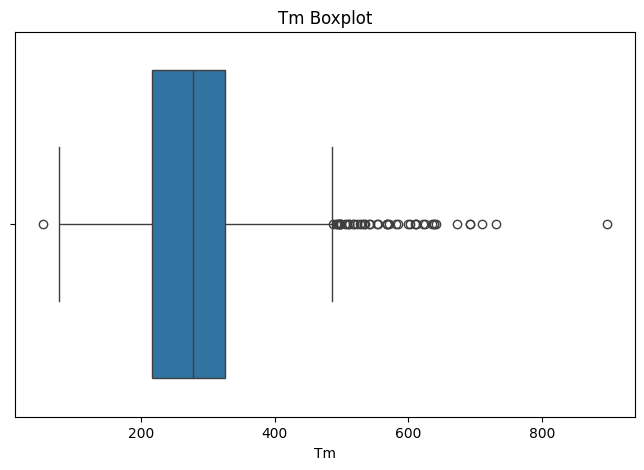

Number of outliers in 'Tm' column: 48


In [ ]:
# Outliers for 'Tm' (Melting Poitn)
plt.figure(figsize=(8,5))
sns.boxplot(x=train['Tm'])
plt.title('Tm Boxplot')
plt.show()

# IQR
Q1 = train['Tm'].quantile(0.25)
Q3 = train['Tm'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = train[(train['Tm'] < lower_bound) | (train['Tm'] > upper_bound)]
print(f"Number of outliers in 'Tm' column: {outliers.shape[0]}")

# not going to drop for now, might be usefull 

In [62]:
models = {
    'LinearRegression' : LinearRegression(),
    'RandomForest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42, verbosity=0),
    'LightGBM': LGBMRegressor(random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # submit
    submission = test[['id']].copy()
    submission['Tm'] = y_pred
    submission.to_csv(f'sample_submission_{name}.csv', index=False)
    print(f'{name} tahminleri sample_submission_{name}.csv dosyasına kaydedildi.')

LinearRegression tahminleri sample_submission_LinearRegression.csv dosyasına kaydedildi.
RandomForest tahminleri sample_submission_RandomForest.csv dosyasına kaydedildi.
RandomForest tahminleri sample_submission_RandomForest.csv dosyasına kaydedildi.
XGBoost tahminleri sample_submission_XGBoost.csv dosyasına kaydedildi.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000635 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 2662, number of used features: 95
[LightGBM] [Info] Start training from score 278.263449
LightGBM tahminleri sample_submission_LightGBM.csv dosyasına kaydedildi.
XGBoost tahminleri sample_submission_XGBoost.csv dosyasına kaydedildi.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing 

In [63]:
# MAE 
mae_results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
    mae_results[name] = -scores.mean()

mae_df = pd.DataFrame(list(mae_results.items()), columns=['Model', 'MAE'])
print(mae_df)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000516 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 612
[LightGBM] [Info] Number of data points in the train set: 2129, number of used features: 84
[LightGBM] [Info] Start training from score 277.353604
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000504 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 607
[LightGBM] [Info] Number of data points in the train set: 2129, number of used features: 83
[LightGBM] [Info] Start training from score 278.576023
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [

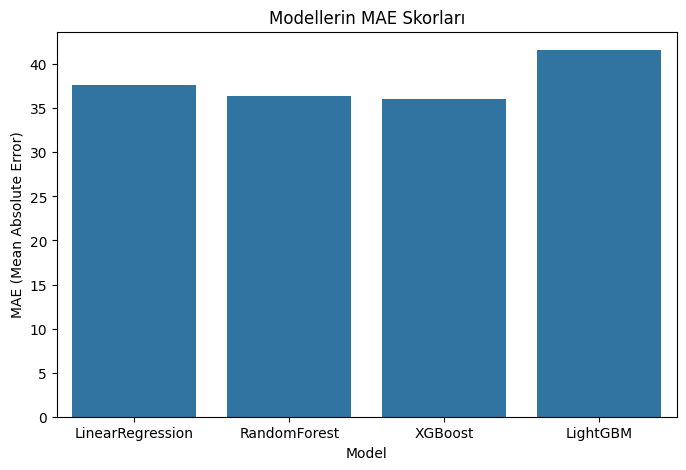

In [70]:
plt.figure(figsize=(8,5))
sns.barplot(x='Model', y='MAE', data=mae_df)
plt.title('Modellerin MAE Skorları')
plt.ylabel('MAE (Mean Absolute Error)')
plt.xlabel('Model')
plt.show()